In [1]:
#https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

2001-01-01    266.0
2001-02-01    145.9
2001-03-01    183.1
2001-04-01    119.3
2001-05-01    180.3
Name: Sales, dtype: float64


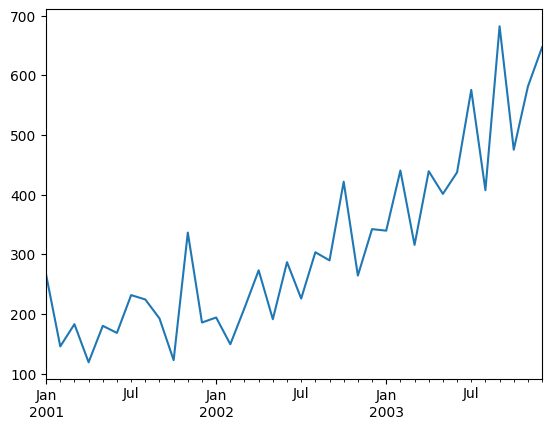

In [77]:
import pandas as pd
from pandas import read_csv
from datetime import datetime  # Use the built-in datetime module
from matplotlib import pyplot
 
def parser(x):
    return datetime.strptime('190' + x, '%Y-%m')

# Read CSV without the 'squeeze' argument
series = read_csv('shampoo_sales.csv', header=0, parse_dates=[0], index_col=0, date_format=parser)

# If you want the result as a Series (for single-column DataFrame)
series = series.squeeze()

# Convert index to a datetime format with default year
formatted_index = [f'0{i.split("-")[0]}-{i.split("-")[1]}' for i in series.index]
series.index = pd.to_datetime(formatted_index, format='%y-%m')

print(series.head())
series.plot()
pyplot.show()

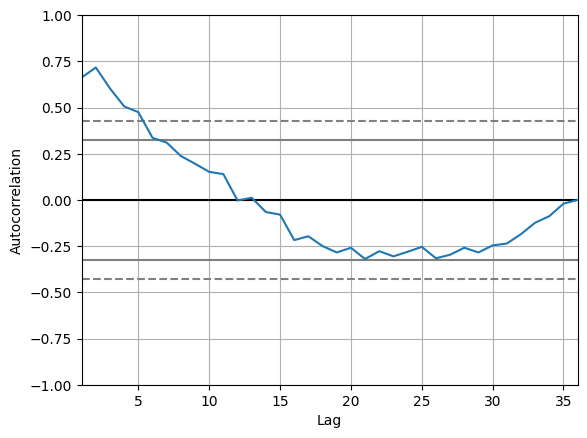

In [69]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

In [70]:
# fit an ARIMA model and plot residual errors
from statsmodels.tsa.arima.model import ARIMA
series.index = series.index.to_period('M')

In [71]:
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Thu, 19 Sep 2024   AIC                            408.969
Time:                        15:44:18   BIC                            418.301
Sample:                    01-31-2001   HQIC                           412.191
                         - 12-31-2003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

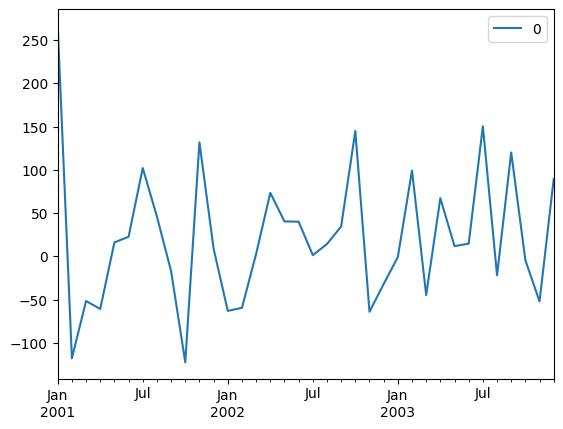

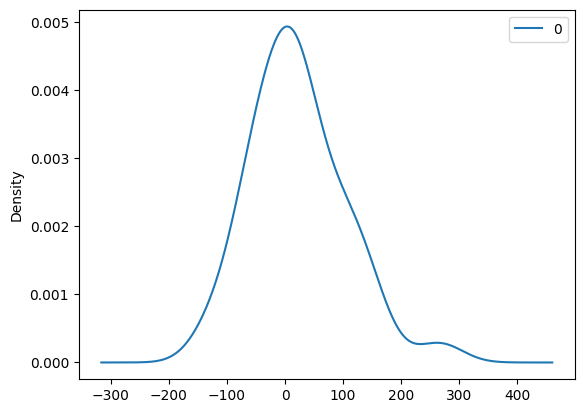

                0
count   36.000000
mean    21.936144
std     80.774430
min   -122.292030
25%    -35.040859
50%     13.147219
75%     68.848286
max    266.000000


In [72]:
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

predicted=343.272180, expected=342.300000
predicted=293.329674, expected=339.700000
predicted=368.668956, expected=440.400000
predicted=335.044741, expected=315.900000
predicted=363.220221, expected=439.300000
predicted=357.645324, expected=401.300000
predicted=443.047835, expected=437.400000
predicted=378.365674, expected=575.500000
predicted=459.415020, expected=407.600000
predicted=526.890876, expected=682.000000
predicted=457.231275, expected=475.300000
predicted=672.914944, expected=581.300000
predicted=531.541449, expected=646.900000
Test RMSE: 89.021


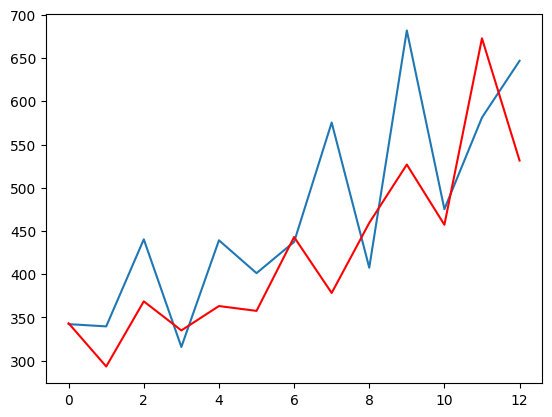

In [73]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [5]:
#https://machinelearningmastery.com/grid-search-arima-hyperparameters-with-python/

In [78]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error

In [79]:
import warnings
warnings.filterwarnings("ignore")

In [80]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [81]:
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=52425.270
ARIMA(0, 0, 1) MSE=38257.790
ARIMA(0, 0, 2) MSE=23989.680
ARIMA(0, 1, 0) MSE=17730.518
ARIMA(0, 1, 1) MSE=10831.968
ARIMA(0, 1, 2) MSE=4670.941
ARIMA(0, 2, 0) MSE=65120.246
ARIMA(0, 2, 1) MSE=18001.166
ARIMA(0, 2, 2) MSE=5571.627
ARIMA(1, 0, 0) MSE=23112.495
ARIMA(1, 0, 1) MSE=12496.378
ARIMA(1, 0, 2) MSE=5940.582
ARIMA(1, 1, 0) MSE=7855.443
ARIMA(1, 1, 1) MSE=7733.869
ARIMA(1, 1, 2) MSE=8278.524
ARIMA(1, 2, 0) MSE=18110.757
ARIMA(1, 2, 1) MSE=7423.089
ARIMA(1, 2, 2) MSE=4291.638
ARIMA(2, 0, 0) MSE=10176.546
ARIMA(2, 0, 1) MSE=9791.684
ARIMA(2, 0, 2) MSE=9739.412
ARIMA(2, 1, 0) MSE=7235.798
ARIMA(2, 1, 1) MSE=7819.497
ARIMA(2, 1, 2) MSE=6971.768
ARIMA(2, 2, 0) MSE=9570.416
ARIMA(2, 2, 1) MSE=5905.434
ARIMA(2, 2, 2) MSE=6529.972
ARIMA(4, 0, 0) MSE=10196.014
ARIMA(4, 0, 1) MSE=10304.270
ARIMA(4, 0, 2) MSE=9500.685
ARIMA(4, 1, 0) MSE=9037.908
ARIMA(4, 1, 1) MSE=7193.885
ARIMA(4, 1, 2) MSE=7090.676
ARIMA(4, 2, 0) MSE=7292.660
ARIMA(4, 2, 1) MSE=5508.510
ARIMA(4

In [82]:
#switch to different dataset

In [83]:
# load dataset
series = read_csv('daily-total-female-births.csv', header=0, index_col=0)

In [84]:
#evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=67.063
ARIMA(0, 0, 1) MSE=62.165
ARIMA(0, 0, 2) MSE=60.384
ARIMA(0, 1, 0) MSE=83.744
ARIMA(0, 1, 1) MSE=55.160
ARIMA(0, 1, 2) MSE=54.048
ARIMA(0, 2, 0) MSE=245.536
ARIMA(0, 2, 1) MSE=84.040
ARIMA(0, 2, 2) MSE=55.574
ARIMA(1, 0, 0) MSE=60.875
ARIMA(1, 0, 1) MSE=57.274
ARIMA(1, 0, 2) MSE=57.011
ARIMA(1, 1, 0) MSE=65.703
ARIMA(1, 1, 1) MSE=53.882
ARIMA(1, 1, 2) MSE=53.720
ARIMA(1, 2, 0) MSE=143.244
ARIMA(1, 2, 1) MSE=65.932
ARIMA(1, 2, 2) MSE=54.867
ARIMA(2, 0, 0) MSE=59.251
ARIMA(2, 0, 1) MSE=56.820
ARIMA(2, 1, 0) MSE=59.291
ARIMA(2, 1, 1) MSE=53.763
ARIMA(2, 1, 2) MSE=54.105
ARIMA(2, 2, 0) MSE=107.219
ARIMA(2, 2, 1) MSE=59.504
ARIMA(4, 0, 0) MSE=59.186
ARIMA(4, 0, 1) MSE=56.307
ARIMA(4, 1, 0) MSE=57.237
ARIMA(4, 1, 1) MSE=54.695
ARIMA(4, 1, 2) MSE=53.589
ARIMA(4, 2, 0) MSE=79.926
ARIMA(4, 2, 1) MSE=57.405
ARIMA(6, 0, 0) MSE=58.769
ARIMA(6, 0, 2) MSE=104.447
ARIMA(6, 1, 0) MSE=53.007
ARIMA(6, 1, 1) MSE=53.877
ARIMA(6, 1, 2) MSE=55.243
ARIMA(6, 2, 0) MSE=69.505
ARIMA(6,